In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from math import radians, cos, sin, asin, sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data_path = os.path.join(os.getcwd(),'fraudTrain.csv')
data_path

'c:\\Users\\ASUS\\Desktop\\MSc\\MSBD 5002\\hdpns_20315566_MSBDT5002_final\\Q4\\Q4 Code\\fraudTrain.csv'

In [3]:
fraud_rawdf = pd.read_csv(data_path,low_memory=False)
fraud_rawdf.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Right off the bat, we can remove trans_num as it does not serve any useful purpose

In [4]:
fraud_rawdf.drop(['trans_num','first','last'],inplace = True,axis = 1)
fraud_rawdf.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [5]:
fraud_rawdf.drop('Unnamed: 0',inplace = True,axis = 1)
fraud_rawdf.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


As I do not want any data leakage, the dataset will be split before applying any transformations. Hence we will have a validation-train set and test set. The validation-train set will be further split into a validation set and train set. 

Text(0.5, 1.0, 'Fraud count distribution')

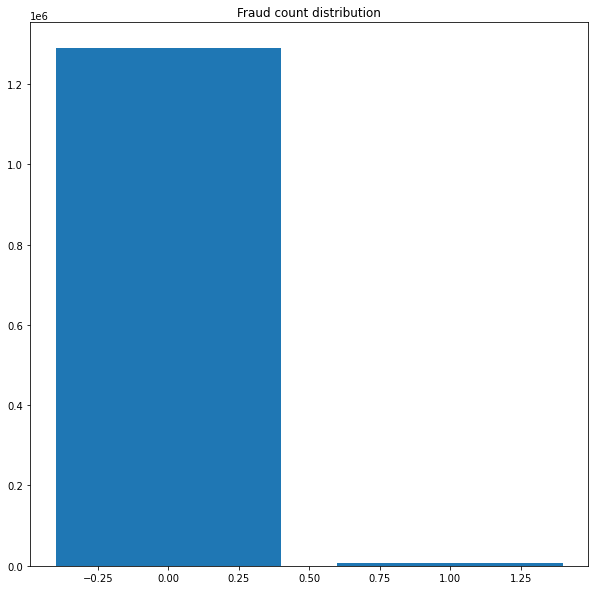

In [6]:
y_data = fraud_rawdf.iloc[:,-1]
fraud_counts = Counter(y_data)
fig,ax_bar = plt.subplots(1,1,figsize = (10,10))
ax_bar.bar(Counter(fraud_counts).keys(),[Counter(fraud_counts)[i] for i in Counter(fraud_counts).keys()])
ax_bar.set_title("Fraud count distribution")

The above bar graph shows that this dataset is highly imbalanced

In [7]:
fraud_data = fraud_rawdf.iloc[:,:-1]
fraud_labels = fraud_rawdf.iloc[:,-1]

In [8]:

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index,test_index in split.split(fraud_data,fraud_labels):
    training_data =  fraud_rawdf.iloc[train_index,:]
    testing_data =  fraud_rawdf.iloc[test_index,:]

In [9]:
Counter(training_data["is_fraud"])

Counter({0: 1031335, 1: 6005})

In [10]:
Counter(testing_data["is_fraud"])

Counter({0: 257834, 1: 1501})

The percentage of classes is maintained in both splits

In [11]:
training_data.drop(["merchant","street"],axis = 1,inplace=True)
training_data.head(5)

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
509059,2019-08-09 03:13:27,639023984367,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,1344482007,44.785928,-74.659301,0
395295,2019-06-29 19:56:48,373905417449658,entertainment,13.78,F,Meridian,TX,76665,31.9290,-97.6443,2526,Phytotherapist,1970-11-12,1340999808,31.414028,-98.152203,0
536531,2019-08-18 14:42:20,3553629419254918,shopping_pos,961.26,F,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,1345300940,49.118546,-122.622065,0
271001,2019-05-13 21:27:46,371034293500716,health_fitness,43.68,M,Vinton,CA,96135,40.0235,-120.7986,128,Education administrator,1966-02-21,1336944466,39.528098,-121.059990,0
532788,2019-08-17 14:15:41,4335531783520911,entertainment,33.08,F,Owensville,MO,65066,38.3511,-91.4867,6703,Naval architect,1998-05-20,1345212941,39.213785,-92.188153,0


In [12]:
#obtaining the transaction time without the date
training_data["trans_date_trans_time"] = pd.to_datetime(training_data["trans_date_trans_time"])
training_data["trans_date_trans_time"].dtype

<ipython-input-12-da6aeac6b9cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data["trans_date_trans_time"] = pd.to_datetime(training_data["trans_date_trans_time"])


dtype('<M8[ns]')

In [13]:
training_data['TimeofDay'] = np.nan
training_data.loc[((training_data['trans_date_trans_time'].dt.hour >= 0) & (training_data['trans_date_trans_time'].dt.hour < 4)),'TimeofDay'] = 'Off Hours'
training_data.loc[(training_data['trans_date_trans_time'].dt.hour >= 4) & (training_data['trans_date_trans_time'].dt.hour < 8),'TimeofDay'] = 'Off Hours'
training_data.loc[(training_data['trans_date_trans_time'].dt.hour >= 8) & (training_data['trans_date_trans_time'].dt.hour < 12),'TimeofDay'] = 'Morning'
training_data.loc[(training_data['trans_date_trans_time'].dt.hour >= 12) & (training_data['trans_date_trans_time'].dt.hour < 16),'TimeofDay'] = 'Noon'
training_data.loc[(training_data['trans_date_trans_time'].dt.hour >= 16) & (training_data['trans_date_trans_time'].dt.hour < 20),'TimeofDay'] = 'Evening'
training_data.loc[(training_data['trans_date_trans_time'].dt.hour >= 20) & (training_data['trans_date_trans_time'].dt.hour < 24),'TimeofDay'] = 'Off Hours'

<ipython-input-13-61a181502f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['TimeofDay'] = np.nan
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [14]:
training_data

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,TimeofDay
509059,2019-08-09 03:13:27,639023984367,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,1344482007,44.785928,-74.659301,0,Off Hours
395295,2019-06-29 19:56:48,373905417449658,entertainment,13.78,F,Meridian,TX,76665,31.9290,-97.6443,2526,Phytotherapist,1970-11-12,1340999808,31.414028,-98.152203,0,Evening
536531,2019-08-18 14:42:20,3553629419254918,shopping_pos,961.26,F,Conway,WA,98238,48.3400,-122.3456,85,"Research officer, political party",1984-09-01,1345300940,49.118546,-122.622065,0,Noon
271001,2019-05-13 21:27:46,371034293500716,health_fitness,43.68,M,Vinton,CA,96135,40.0235,-120.7986,128,Education administrator,1966-02-21,1336944466,39.528098,-121.059990,0,Off Hours
532788,2019-08-17 14:15:41,4335531783520911,entertainment,33.08,F,Owensville,MO,65066,38.3511,-91.4867,6703,Naval architect,1998-05-20,1345212941,39.213785,-92.188153,0,Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125527,2019-03-10 21:06:15,30044330818990,entertainment,19.70,F,Fort Myers,FL,33967,26.4722,-81.8122,224256,Paramedic,1985-08-29,1331413575,26.986105,-82.688123,0,Off Hours
150047,2019-03-22 05:06:39,3587044315915002,shopping_pos,123.45,M,Grand Junction,TN,38039,35.0659,-89.1534,1804,Clothing/textile technologist,1974-10-15,1332392799,35.018147,-88.395919,0,Off Hours
1151888,2020-04-25 18:11:52,4169759661243568,food_dining,64.98,F,Lawn,PA,17041,40.2236,-76.5380,213,Special educational needs teacher,1972-02-15,1366913512,40.191038,-77.350918,0,Evening
547306,2019-08-22 14:59:38,30118423745458,kids_pets,33.65,M,Matawan,NJ,7747,40.4109,-74.2380,30770,Drilling engineer,1993-04-29,1345647578,40.081094,-73.434345,0,Noon


In [15]:
timeofdayfraud = pd.crosstab(training_data["is_fraud"],training_data['TimeofDay'])
timeofdayfraud

TimeofDay,Evening,Morning,Noon,Off Hours
is_fraud,,,,
0,209828,135260,208271,477976
1,250,145,252,5358


As observed from the above contingency table, the Off Hours time period of 8pm to 8 am tends to have a higher number in credit card fraud, while other time periods only have 647 incidents in total. 

In [16]:
def check_chi2_correlation(contingency_table):
    DOF = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    critical_val = chi2.ppf(0.95,DOF)
    stat,p,dof,expected_array = chi2_contingency(contingency_table)
    if stat > critical_val:
        print(f"Reject Null Hypotheses. Critical Value for 0.95 siginficance : {critical_val}, DOF : {DOF}. Chi2 statistic : {stat}")
    else:
        print(f"No correlation. Critical Value for 0.95 siginficance : {critical_val}. Chi2 statistic : {stat}")

check_chi2_correlation(timeofdayfraud)

Reject Null Hypotheses. Critical Value for 0.95 siginficance : 7.814727903251179, DOF : 3. Chi2 statistic : 4411.808966545986


As seen above, there is a statistically significant correlation between Off Hours and fraud occurence

In [17]:
#finding the 25%,median and 75% for all categories of transactions
#using median as the mean will be affected by outliers
medianlist = list()
seventyfive_perc = list()
twentyfive_perc = list()
key_list = list()
grouped_category = training_data.groupby("category")
for key,group in grouped_category:
    key_list.append(key)

for key in key_list:
    temp = grouped_category.get_group(key)
    medianlist.append(temp["amt"].describe()["50%"])
    seventyfive_perc.append(temp["amt"].describe()["75%"])
    twentyfive_perc.append(temp["amt"].describe()["25%"])

category_details = pd.DataFrame({'category':key_list,'25%':twentyfive_perc,'50%':medianlist,'75%':seventyfive_perc})
category_details

,category,25%,50%,75%
0,entertainment,17.170,50.75,83.1700
1,food_dining,12.440,42.00,68.4500
2,gas_transport,52.500,62.84,73.3800
3,grocery_net,38.660,50.82,65.8500
4,grocery_pos,82.375,105.10,138.8750
5,health_fitness,17.280,42.84,75.4500
6,home,21.250,48.33,81.1400
7,kids_pets,22.690,47.20,76.1000
8,misc_net,4.810,9.82,87.6200
9,misc_pos,5.240,14.05,51.4450


In [18]:
#combining the training_data dataframe with the category_details
training_data = training_data.merge(category_details,how = 'inner',on = 'category')
training_data.head(5)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,...,job,dob,unix_time,merch_lat,merch_long,is_fraud,TimeofDay,25%,50%,75%
0,2019-08-09 03:13:27,639023984367,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,...,Chief Executive Officer,1991-06-05,1344482007,44.785928,-74.659301,0,Off Hours,38.66,50.82,65.85
1,2020-01-19 10:08:49,30044330818990,grocery_net,85.83,F,Fort Myers,FL,33967,26.4722,-81.8122,...,Paramedic,1985-08-29,1358590129,27.432813,-82.595641,0,Morning,38.66,50.82,65.85
2,2020-02-28 07:00:46,4010002218955876,grocery_net,57.37,F,Houston,TX,77026,29.7972,-95.3288,...,Animator,1983-08-24,1362034846,30.146557,-95.586159,0,Off Hours,38.66,50.82,65.85
3,2019-08-31 05:17:35,38199021865320,grocery_net,49.08,M,Acworth,NH,3601,43.1960,-72.3001,...,Naval architect,1988-04-15,1346390255,42.284841,-71.533501,0,Off Hours,38.66,50.82,65.85
4,2019-08-12 06:53:40,36722699017270,grocery_net,50.90,F,Superior,AZ,85173,33.2887,-111.0985,...,Petroleum engineer,1987-10-28,1344754420,32.750004,-111.711610,0,Off Hours,38.66,50.82,65.85


In [19]:
#outliers tend to be defined as values that are greater then 1.5*IQR + 75% and 25% - 1.5*IQR
training_data["Outside upper/lower bounds"] = np.nan
training_data.loc[(training_data["amt"] < (training_data["25%"] - 1.5*(training_data["75%"] - training_data["25%"]))) | \
                 (training_data["amt"] > (training_data["75%"] + 1.5*(training_data["75%"] - training_data["25%"]))),"Outside upper/lower bounds"] = 1
training_data.head(5)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,...,dob,unix_time,merch_lat,merch_long,is_fraud,TimeofDay,25%,50%,75%,Outside upper/lower bounds
0,2019-08-09 03:13:27,639023984367,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,...,1991-06-05,1344482007,44.785928,-74.659301,0,Off Hours,38.66,50.82,65.85,NaN
1,2020-01-19 10:08:49,30044330818990,grocery_net,85.83,F,Fort Myers,FL,33967,26.4722,-81.8122,...,1985-08-29,1358590129,27.432813,-82.595641,0,Morning,38.66,50.82,65.85,NaN
2,2020-02-28 07:00:46,4010002218955876,grocery_net,57.37,F,Houston,TX,77026,29.7972,-95.3288,...,1983-08-24,1362034846,30.146557,-95.586159,0,Off Hours,38.66,50.82,65.85,NaN
3,2019-08-31 05:17:35,38199021865320,grocery_net,49.08,M,Acworth,NH,3601,43.1960,-72.3001,...,1988-04-15,1346390255,42.284841,-71.533501,0,Off Hours,38.66,50.82,65.85,NaN
4,2019-08-12 06:53:40,36722699017270,grocery_net,50.90,F,Superior,AZ,85173,33.2887,-111.0985,...,1987-10-28,1344754420,32.750004,-111.711610,0,Off Hours,38.66,50.82,65.85,NaN


In [20]:
training_data.fillna(0,inplace = True)

In [21]:
training_data.head(5)

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,...,dob,unix_time,merch_lat,merch_long,is_fraud,TimeofDay,25%,50%,75%,Outside upper/lower bounds
0,2019-08-09 03:13:27,639023984367,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,...,1991-06-05,1344482007,44.785928,-74.659301,0,Off Hours,38.66,50.82,65.85,0.0
1,2020-01-19 10:08:49,30044330818990,grocery_net,85.83,F,Fort Myers,FL,33967,26.4722,-81.8122,...,1985-08-29,1358590129,27.432813,-82.595641,0,Morning,38.66,50.82,65.85,0.0
2,2020-02-28 07:00:46,4010002218955876,grocery_net,57.37,F,Houston,TX,77026,29.7972,-95.3288,...,1983-08-24,1362034846,30.146557,-95.586159,0,Off Hours,38.66,50.82,65.85,0.0
3,2019-08-31 05:17:35,38199021865320,grocery_net,49.08,M,Acworth,NH,3601,43.1960,-72.3001,...,1988-04-15,1346390255,42.284841,-71.533501,0,Off Hours,38.66,50.82,65.85,0.0
4,2019-08-12 06:53:40,36722699017270,grocery_net,50.90,F,Superior,AZ,85173,33.2887,-111.0985,...,1987-10-28,1344754420,32.750004,-111.711610,0,Off Hours,38.66,50.82,65.85,0.0


In [22]:
training_data["Outside upper/lower bounds"] = training_data["Outside upper/lower bounds"].astype(np.int16)
training_data.head()

,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,lat,long,...,dob,unix_time,merch_lat,merch_long,is_fraud,TimeofDay,25%,50%,75%,Outside upper/lower bounds
0,2019-08-09 03:13:27,639023984367,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,...,1991-06-05,1344482007,44.785928,-74.659301,0,Off Hours,38.66,50.82,65.85,0
1,2020-01-19 10:08:49,30044330818990,grocery_net,85.83,F,Fort Myers,FL,33967,26.4722,-81.8122,...,1985-08-29,1358590129,27.432813,-82.595641,0,Morning,38.66,50.82,65.85,0
2,2020-02-28 07:00:46,4010002218955876,grocery_net,57.37,F,Houston,TX,77026,29.7972,-95.3288,...,1983-08-24,1362034846,30.146557,-95.586159,0,Off Hours,38.66,50.82,65.85,0
3,2019-08-31 05:17:35,38199021865320,grocery_net,49.08,M,Acworth,NH,3601,43.1960,-72.3001,...,1988-04-15,1346390255,42.284841,-71.533501,0,Off Hours,38.66,50.82,65.85,0
4,2019-08-12 06:53:40,36722699017270,grocery_net,50.90,F,Superior,AZ,85173,33.2887,-111.0985,...,1987-10-28,1344754420,32.750004,-111.711610,0,Off Hours,38.66,50.82,65.85,0


In [23]:
training_data.loc[(training_data["Outside upper/lower bounds"] == 1) & (training_data["TimeofDay"] == 'Off Hours')]["is_fraud"].value_counts()

0    24931
1     4537
Name: is_fraud, dtype: int64

In [24]:
training_data["is_fraud"].value_counts()

0    1031335
1       6005
Name: is_fraud, dtype: int64

<h2> IMPORTANT FINDING </h2>

As shown in the Value Counts above, when the amount spent on a given category is greater than or below the Outlier bounds (75th percentile + 1.5IQR and 25th percentile - 1.5IQR), and when the time of day is in the Off Hours (8pm to 8am), 4537 Credit Card Frauds occur. In total the training_data dataframe has 6005 Frauds. This is 75.5% of the total frauds showing that these 2 features are very important in identifying frauds

In [25]:
#as the required insight is extracted from the percentiles, we can drop it off
#Also cc_num and unix time can be dropped off as cc_num is the credit card number and unix time is already represented by trans_date_trans_time
training_data.drop(['25%','50%','75%','cc_num','unix_time'],axis = 1,inplace=True)
training_data.head()

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,TimeofDay,Outside upper/lower bounds
0,2019-08-09 03:13:27,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,44.785928,-74.659301,0,Off Hours,0
1,2020-01-19 10:08:49,grocery_net,85.83,F,Fort Myers,FL,33967,26.4722,-81.8122,224256,Paramedic,1985-08-29,27.432813,-82.595641,0,Morning,0
2,2020-02-28 07:00:46,grocery_net,57.37,F,Houston,TX,77026,29.7972,-95.3288,2906700,Animator,1983-08-24,30.146557,-95.586159,0,Off Hours,0
3,2019-08-31 05:17:35,grocery_net,49.08,M,Acworth,NH,3601,43.1960,-72.3001,477,Naval architect,1988-04-15,42.284841,-71.533501,0,Off Hours,0
4,2019-08-12 06:53:40,grocery_net,50.90,F,Superior,AZ,85173,33.2887,-111.0985,2872,Petroleum engineer,1987-10-28,32.750004,-111.711610,0,Off Hours,0


In [26]:
training_data.loc[training_data["is_fraud"] == 1]

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,TimeofDay,Outside upper/lower bounds
521,2020-02-24 02:42:04,grocery_net,12.73,M,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,33.403177,-106.292633,1,Off Hours,0
1317,2019-08-13 00:38:21,grocery_net,12.20,M,Rock Glen,PA,18246,40.9540,-76.1747,143,Health and safety adviser,1982-02-19,41.636537,-76.813123,1,Off Hours,0
1803,2019-07-06 00:36:57,grocery_net,12.81,F,Higganum,CT,6441,41.4682,-72.5751,5438,"Librarian, academic",1964-11-17,40.770361,-72.209834,1,Off Hours,0
2399,2019-12-02 01:53:50,grocery_net,9.99,M,Mounds,OK,74047,35.8896,-96.0887,7163,Fitness centre manager,1982-02-05,36.785658,-96.025005,1,Off Hours,0
2448,2019-10-02 07:34:40,grocery_net,12.10,F,Dubre,KY,42731,36.8421,-85.5396,341,Insurance risk surveyor,1932-11-19,36.156708,-85.788662,1,Off Hours,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037027,2019-02-25 02:18:56,misc_net,765.47,F,Bagley,WI,53801,42.9207,-91.0685,878,Risk analyst,1974-11-20,42.564863,-90.893331,1,Off Hours,1
1037028,2019-04-25 03:07:33,misc_net,723.19,M,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,29.751163,-94.536470,1,Off Hours,1
1037198,2019-11-30 23:00:09,misc_net,659.87,M,Howells,NE,68641,41.6964,-96.9858,1063,Research scientist (maths),1928-04-02,41.043728,-97.376716,1,Off Hours,1
1037279,2019-06-11 18:42:17,misc_net,984.82,F,Dexter,KS,67038,37.1641,-96.6917,602,"Buyer, industrial",1958-10-26,37.925149,-97.230261,1,Evening,1


Text(0.5, 1.0, 'Fraud count distribution on State level')

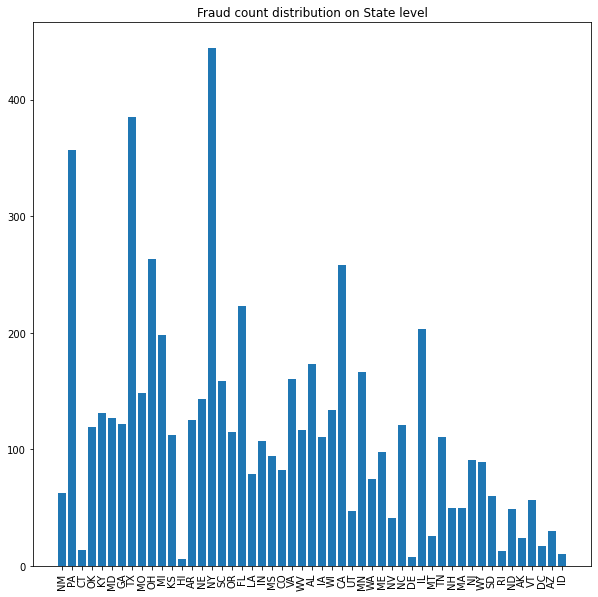

In [27]:
statecounts = Counter(training_data.loc[training_data["is_fraud"] == 1]["state"])
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.bar(statecounts.keys(),[statecounts[i] for i in statecounts.keys()])
plt.xticks(rotation = 90)
ax.set_title("Fraud count distribution on State level")

In [28]:
print(f'Number of States with Credit Card Fraud : {len(statecounts.keys())}')

Number of States with Credit Card Fraud : 51


In [29]:
states = list(statecounts.keys())
state_grouped = training_data.groupby("state")
state_count = list()
for key in states:
    state_count.append(sum(state_grouped.get_group(key)["is_fraud"]))

state_level_df = pd.DataFrame({"State":states,"Fraud Counts":state_count})
state_level_df


,State,Fraud Counts
0,NM,63
1,PA,357
2,CT,14
3,OK,119
4,KY,131
5,MD,127
6,GA,122
7,TX,385
8,MO,148
9,OH,263


In [30]:
kmeans = KMeans(n_clusters = 4)
state_level_df["State Risk Category"] = kmeans.fit_predict(np.array(state_level_df["Fraud Counts"]).reshape(-1,1),state_level_df["State"])
state_level_df

,State,Fraud Counts,State Risk Category
0,NM,63,2
1,PA,357,1
2,CT,14,2
3,OK,119,0
4,KY,131,0
5,MD,127,0
6,GA,122,0
7,TX,385,1
8,MO,148,0
9,OH,263,3


In [31]:
#mapping the risk levels obtained from KMeans clustering 
risk_dict = {0:"Risk 0",1:"Risk 1",2:"Risk 3",3:"Risk 2"}
state_level_df["State Risk Category"] = state_level_df["State Risk Category"].apply(lambda x:risk_dict[x])
state_level_df

,State,Fraud Counts,State Risk Category
0,NM,63,Risk 3
1,PA,357,Risk 1
2,CT,14,Risk 3
3,OK,119,Risk 0
4,KY,131,Risk 0
5,MD,127,Risk 0
6,GA,122,Risk 0
7,TX,385,Risk 1
8,MO,148,Risk 0
9,OH,263,Risk 2


In [32]:
training_data = training_data.merge(state_level_df,how= 'inner',left_on='state',right_on='State')
training_data

,trans_date_trans_time,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,TimeofDay,Outside upper/lower bounds,State,Fraud Counts,State Risk Category
0,2019-08-09 03:13:27,grocery_net,51.71,F,Hannawa Falls,NY,13647,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,44.785928,-74.659301,0,Off Hours,0,NY,444,Risk 1
1,2019-02-25 02:56:04,grocery_net,39.67,F,Cottekill,NY,12419,41.8467,-74.1038,722,Comptroller,1990-10-19,41.598882,-74.584269,0,Off Hours,0,NY,444,Risk 1
2,2020-03-09 09:44:14,grocery_net,48.29,M,Saint Bonaventure,NY,14778,42.2701,-78.6847,1453,Toxicologist,1974-02-15,41.950092,-77.853478,0,Morning,0,NY,444,Risk 1
3,2019-07-23 01:27:57,grocery_net,71.91,F,West Sayville,NY,11796,40.7320,-73.1000,4056,Film/video editor,1990-06-25,40.368050,-72.166660,0,Off Hours,0,NY,444,Risk 1
4,2019-09-11 00:09:35,grocery_net,30.99,F,Cottekill,NY,12419,41.8467,-74.1038,722,Comptroller,1990-10-19,42.471272,-73.403263,0,Off Hours,0,NY,444,Risk 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,2019-04-28 10:24:34,grocery_pos,296.25,F,Georgetown,DE,19947,38.6790,-75.3932,18799,"Designer, multimedia",2000-03-16,38.593896,-76.031493,1,Morning,1,DE,8,Risk 3
1037336,2019-04-28 02:33:09,grocery_pos,280.26,F,Georgetown,DE,19947,38.6790,-75.3932,18799,"Designer, multimedia",2000-03-16,38.523208,-74.460889,1,Off Hours,1,DE,8,Risk 3
1037337,2019-04-29 23:51:22,shopping_net,960.49,F,Georgetown,DE,19947,38.6790,-75.3932,18799,"Designer, multimedia",2000-03-16,39.073319,-75.545153,1,Off Hours,1,DE,8,Risk 3
1037338,2019-04-29 03:29:41,misc_net,885.96,F,Georgetown,DE,19947,38.6790,-75.3932,18799,"Designer, multimedia",2000-03-16,39.666374,-76.358642,1,Off Hours,1,DE,8,Risk 3


In [33]:
training_data.drop(['state','zip','State','Fraud Counts'],axis = 1,inplace = True)
training_data.head(5)

,trans_date_trans_time,category,amt,gender,city,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,TimeofDay,Outside upper/lower bounds,State Risk Category
0,2019-08-09 03:13:27,grocery_net,51.71,F,Hannawa Falls,44.6087,-74.9732,69,Chief Executive Officer,1991-06-05,44.785928,-74.659301,0,Off Hours,0,Risk 1
1,2019-02-25 02:56:04,grocery_net,39.67,F,Cottekill,41.8467,-74.1038,722,Comptroller,1990-10-19,41.598882,-74.584269,0,Off Hours,0,Risk 1
2,2020-03-09 09:44:14,grocery_net,48.29,M,Saint Bonaventure,42.2701,-78.6847,1453,Toxicologist,1974-02-15,41.950092,-77.853478,0,Morning,0,Risk 1
3,2019-07-23 01:27:57,grocery_net,71.91,F,West Sayville,40.7320,-73.1000,4056,Film/video editor,1990-06-25,40.368050,-72.166660,0,Off Hours,0,Risk 1
4,2019-09-11 00:09:35,grocery_net,30.99,F,Cottekill,41.8467,-74.1038,722,Comptroller,1990-10-19,42.471272,-73.403263,0,Off Hours,0,Risk 1


In [34]:
training_data.drop(['trans_date_trans_time','dob'],axis = 1,inplace=True)
training_data

,category,amt,gender,city,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,TimeofDay,Outside upper/lower bounds,State Risk Category
0,grocery_net,51.71,F,Hannawa Falls,44.6087,-74.9732,69,Chief Executive Officer,44.785928,-74.659301,0,Off Hours,0,Risk 1
1,grocery_net,39.67,F,Cottekill,41.8467,-74.1038,722,Comptroller,41.598882,-74.584269,0,Off Hours,0,Risk 1
2,grocery_net,48.29,M,Saint Bonaventure,42.2701,-78.6847,1453,Toxicologist,41.950092,-77.853478,0,Morning,0,Risk 1
3,grocery_net,71.91,F,West Sayville,40.7320,-73.1000,4056,Film/video editor,40.368050,-72.166660,0,Off Hours,0,Risk 1
4,grocery_net,30.99,F,Cottekill,41.8467,-74.1038,722,Comptroller,42.471272,-73.403263,0,Off Hours,0,Risk 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,grocery_pos,296.25,F,Georgetown,38.6790,-75.3932,18799,"Designer, multimedia",38.593896,-76.031493,1,Morning,1,Risk 3
1037336,grocery_pos,280.26,F,Georgetown,38.6790,-75.3932,18799,"Designer, multimedia",38.523208,-74.460889,1,Off Hours,1,Risk 3
1037337,shopping_net,960.49,F,Georgetown,38.6790,-75.3932,18799,"Designer, multimedia",39.073319,-75.545153,1,Off Hours,1,Risk 3
1037338,misc_net,885.96,F,Georgetown,38.6790,-75.3932,18799,"Designer, multimedia",39.666374,-76.358642,1,Off Hours,1,Risk 3


In [35]:
#function to calculate distance between latitude longitude points
#function is from https://www.geeksforgeeks.org/program-distance-two-points-earth/


def distance(x):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(x["long"])
    lon2 = radians(x["merch_long"])
    lat1 = radians(x["lat"])
    lat2 = radians(x["merch_lat"])
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers.
    r = 6371
      
    # calculate the result
    return(c * r)

In [36]:
training_data["Distance From Registered Location"] = np.nan

training_data["Distance From Registered Location"] = training_data.apply(lambda x: distance(x),axis = 1)

<h3>Is the mean distance from a user to merchent location siginificantly different for fraud and normal cases?</h3>

In [37]:
#
f_oneway(training_data.loc[training_data["is_fraud"] == 1]["Distance From Registered Location"],training_data.loc[training_data["is_fraud"] == 0]["Distance From Registered Location"])

F_onewayResult(statistic=0.00719515224424364, pvalue=0.9324011358719074)

<h3> There is no statistical significance as the pvalue is greater than 0.05. Hence this value can be removed</h3>

In [38]:
training_data.drop(['lat','long','Distance From Registered Location'],inplace=True,axis = 1)

In [39]:
training_data.drop(['merch_lat','merch_long'],inplace= True,axis = 1)
training_data.head()

,category,amt,gender,city,city_pop,job,is_fraud,TimeofDay,Outside upper/lower bounds,State Risk Category
0,grocery_net,51.71,F,Hannawa Falls,69,Chief Executive Officer,0,Off Hours,0,Risk 1
1,grocery_net,39.67,F,Cottekill,722,Comptroller,0,Off Hours,0,Risk 1
2,grocery_net,48.29,M,Saint Bonaventure,1453,Toxicologist,0,Morning,0,Risk 1
3,grocery_net,71.91,F,West Sayville,4056,Film/video editor,0,Off Hours,0,Risk 1
4,grocery_net,30.99,F,Cottekill,722,Comptroller,0,Off Hours,0,Risk 1


In [16]:
class fraudDetection:
    def __init__(self):
        self.category_details = None
        self.state_level_df = None
        self.scaler = None
    def get_train_test_set(self,df):
        df.drop(['trans_num','first','last','Unnamed: 0'],inplace = True,axis = 1)
        df_data = df.iloc[:,:-1]
        df_labels = df.iloc[:,-1]
        split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
        for train_index,test_index in split.split(df_data,df_labels):
            training_data =  df.iloc[train_index,:]
            testing_data =  df.iloc[test_index,:]
        return training_data,testing_data
    def get_grouped_category_details(self,df):
        #function to obtain the grouped category details
        medianlist = list()
        seventyfive_perc = list()
        twentyfive_perc = list()
        key_list = list()
        grouped_category = df.groupby("category")
        for key,group in grouped_category:
            key_list.append(key)

        for key in key_list:
            temp = grouped_category.get_group(key)
            medianlist.append(temp["amt"].describe()["50%"])
            seventyfive_perc.append(temp["amt"].describe()["75%"])
            twentyfive_perc.append(temp["amt"].describe()["25%"])

        category_details = pd.DataFrame({'category':key_list,'25%':twentyfive_perc,'50%':medianlist,'75%':seventyfive_perc})
        category_details
        return category_details
        
    def get_grouped_state_details(self,df):
        statecounts = Counter(df.loc[df["is_fraud"] == 1]["state"])
        states = list(statecounts.keys())
        state_grouped = df.groupby("state")
        state_count = list()
        for key in states:
            state_count.append(sum(state_grouped.get_group(key)["is_fraud"]))

        state_level_df = pd.DataFrame({"State":states,"Fraud Counts":state_count})
        #Use KMeans to identify the clusters of Risk level with respect to Credit card fraud in each State
        kmeans = KMeans(n_clusters = 4)
        state_level_df["State Risk Category"] = kmeans.fit_predict(np.array(state_level_df["Fraud Counts"]).reshape(-1,1),state_level_df["State"])
        #mapping the risk levels obtained from KMeans clustering 
        risk_dict = {0:"Risk 0",1:"Risk 1",2:"Risk 3",3:"Risk 2"}
        state_level_df["State Risk Category"] = state_level_df["State Risk Category"].apply(lambda x:risk_dict[x])
        return state_level_df

    def one_hot_encode_categories(self,df):
        df = pd.concat((df,pd.get_dummies(df["category"])),axis = 1)
        df = pd.concat((df,pd.get_dummies(df["gender"])),axis = 1)
        df = pd.concat((df,pd.get_dummies(df["TimeofDay"])),axis = 1)
        df = pd.concat((df,pd.get_dummies(df["State Risk Category"])),axis = 1)
        df.drop(['category','gender','TimeofDay','State Risk Category','city','job'],axis = 1,inplace = True)
        columns = filter(lambda x: x!= "is_fraud",df.columns.tolist())
        return df[columns],df["is_fraud"]
    
    def fitandtransform(self,df,train = True):
        df.drop(["merchant","street"],axis = 1,inplace=True)
        df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
        #making Time of Day
        df['TimeofDay'] = np.nan
        df.loc[((df['trans_date_trans_time'].dt.hour >= 0) & (df['trans_date_trans_time'].dt.hour < 4)),'TimeofDay'] = 'Off Hours'
        df.loc[(df['trans_date_trans_time'].dt.hour >= 4) & (df['trans_date_trans_time'].dt.hour < 8),'TimeofDay'] = 'Off Hours'
        df.loc[(df['trans_date_trans_time'].dt.hour >= 8) & (df['trans_date_trans_time'].dt.hour < 12),'TimeofDay'] = 'Morning'
        df.loc[(df['trans_date_trans_time'].dt.hour >= 12) & (df['trans_date_trans_time'].dt.hour < 16),'TimeofDay'] = 'Noon'
        df.loc[(df['trans_date_trans_time'].dt.hour >= 16) & (df['trans_date_trans_time'].dt.hour < 20),'TimeofDay'] = 'Evening'
        df.loc[(df['trans_date_trans_time'].dt.hour >= 20) & (df['trans_date_trans_time'].dt.hour < 24),'TimeofDay'] = 'Off Hours'
        if train == True:
            #get the grouped category details
            self.category_details = self.get_grouped_category_details(df)
        df = df.merge(self.category_details,how = 'inner',on = 'category')
        #Check if the transaction amount values are outside the upper and lower bounds
        df["Outside upper/lower bounds"] = np.nan
        df.loc[(df["amt"] < (df["25%"] - 1.5*(df["75%"] - df["25%"]))) | \
                        (df["amt"] > (df["75%"] + 1.5*(df["75%"] - df["25%"]))),"Outside upper/lower bounds"] = 1
        df.fillna(0,inplace = True)
        df["Outside upper/lower bounds"] = df["Outside upper/lower bounds"].astype(np.int16)
        df.drop(['25%','50%','75%','cc_num','unix_time'],axis = 1,inplace=True)
        if train == True:
            self.state_level_df = self.get_grouped_state_details(df)
        df = df.merge(self.state_level_df,how= 'inner',left_on='state',right_on='State')

        df.drop(['state','zip','State','Fraud Counts'],axis = 1,inplace = True)
        df.drop(['trans_date_trans_time','dob'],axis = 1,inplace=True)
        df.drop(['lat','long','merch_lat','merch_long'],inplace=True,axis = 1)
        df,dflabels = self.one_hot_encode_categories(df)

        if train == True:
            self.scaler = StandardScaler()
            self.scaler.fit(df[['amt','city_pop']])
        df[['amt','city_pop']] = self.scaler.transform(df[['amt','city_pop']])

        return df,dflabels
    

In [9]:
data_path = os.path.join(os.getcwd(),'fraudTrain.csv')
data_path

'c:\\Users\\ASUS\\Desktop\\MSc\\MSBD 5002\\hdpns_20315566_MSBDT5002_final\\Q4\\Q4 Code\\fraudTrain.csv'

In [17]:
fraud_rawdf = pd.read_csv(data_path,low_memory=False)

In [18]:
fraudDetectionclass = fraudDetection()
training_data,testing_data = fraudDetectionclass.get_train_test_set(fraud_rawdf)
# processed_training_data = prepare_data_function(training_data)
processed_training_data,training_labels = fraudDetectionclass.fitandtransform(training_data,train = True)

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-16-216dfbf11bf8>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
<ipython-input-16-216dfbf11bf8>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [26]:
processed_training_data

,amt,city_pop,Outside upper/lower bounds,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,F,M,Evening,Morning,Noon,Off Hours,Risk 0,Risk 1,Risk 2,Risk 3
0,-0.118626,-0.293624,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,-0.195285,-0.291462,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,-0.140401,-0.289042,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.009989,-0.280423,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,-0.250551,-0.291462,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037335,1.438375,-0.231608,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
1037336,1.336566,-0.231608,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1037337,5.667633,-0.231608,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
1037338,5.193095,-0.231608,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


<h3> Investigating the performance of a standalone decision tree on the processed dataset </h3>

In [27]:
max_depth = [10,20,30,40,50]
parameters = {'max_depth':max_depth, 'criterion':['gini','entropy']}
dtree = DecisionTreeClassifier()
gridsearch_dtree = GridSearchCV(dtree,param_grid=parameters,scoring = {"AUC": "roc_auc"},return_train_score=True,cv=5,refit="AUC",verbose=2)
gridsearch_dtree.fit(processed_training_data,training_labels)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................criterion=gini, max_depth=10; total time=   4.7s
[CV] END .......................criterion=gini, max_depth=10; total time=   3.6s
[CV] END .......................criterion=gini, max_depth=10; total time=   3.4s
[CV] END .......................criterion=gini, max_depth=10; total time=   3.4s
[CV] END .......................criterion=gini, max_depth=10; total time=   3.4s
[CV] END .......................criterion=gini, max_depth=20; total time=   3.7s
[CV] END .......................criterion=gini, max_depth=20; total time=   3.8s
[CV] END .......................criterion=gini, max_depth=20; total time=   3.8s
[CV] END .......................criterion=gini, max_depth=20; total time=   3.7s
[CV] END .......................criterion=gini, max_depth=20; total time=   3.6s
[CV] END .......................criterion=gini, max_depth=30; total time=   3.6s
[CV] END .......................criterion=gini, 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50]},
             refit='AUC', return_train_score=True, scoring={'AUC': 'roc_auc'},
             verbose=2)

In [28]:
gridsearch_dtree.cv_results_

{'mean_fit_time': array([3.51205401, 3.68497376, 3.65958977, 3.82617722, 3.96588159,
        3.14909258, 3.26469774, 2.89707346, 2.81349902, 3.20720205]),
 'std_fit_time': array([0.15608833, 0.05891567, 0.03063077, 0.19477274, 0.4516693 ,
        0.18419793, 0.24027771, 0.13438517, 0.03177122, 0.18360533]),
 'mean_score_time': array([0.27163215, 0.11877203, 0.08597345, 0.08456573, 0.08058462,
        0.08616886, 0.08537779, 0.08018651, 0.07839766, 0.08099823]),
 'std_score_time': array([0.36631117, 0.04288989, 0.00201572, 0.00117717, 0.00097696,
        0.00990496, 0.00325703, 0.00241083, 0.00079233, 0.00146891]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'entropy',
                    'entropy', 'entropy', 'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 20, 30, 40, 50, 1

In [29]:
y_pred_proba = gridsearch_dtree.best_estimator_.predict_proba(processed_training_data)
roc_auc_score(training_labels,y_pred_proba[:,1])

0.9978071890823123

In [30]:
gridsearch_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [31]:
processed_testing_data,testing_labels = fraudDetectionclass.fitandtransform(testing_data,train = False)
y_pred_test_proba = gridsearch_dtree.best_estimator_.predict_proba(processed_testing_data)
roc_auc_score(testing_labels,y_pred_test_proba[:,1])

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-16-216dfbf11bf8>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
<ipython-input-16-216dfbf11bf8>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

0.983539206497803

As mentioned in the Question 4 Task, it is said that the model's performance will be based on the AUC score. In the above steps I have both investigated the model with the entire training set and testing set. 

NOTE: This model has had absolutely no influence from the test set as all Exploratory Data Analysis was done using the training set and the cross validation and fitting of model was also done by using Stratified K folds of the training set. Hence the test set is a competely new exposure to this model. 

In this I manage to get 0.982 for ROC AUC score which is close to a near perfect classifier which would have a AUC score of 1. 

The Best Parameters are found to be a Decision Tree of max depth 10. 

In [32]:
entire_processed_dataset = pd.concat((processed_training_data,processed_testing_data),axis = 0)
entire_processed_dataset

,amt,city_pop,Outside upper/lower bounds,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,...,F,M,Evening,Morning,Noon,Off Hours,Risk 0,Risk 1,Risk 2,Risk 3
0,-0.118626,-0.293624,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
1,-0.195285,-0.291462,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,-0.140401,-0.289042,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.009989,-0.280423,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,-0.250551,-0.291462,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259330,-0.237181,0.380184,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
259331,0.416844,0.380184,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1
259332,-0.285252,0.380184,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
259333,-0.320844,0.380184,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [50]:
#Predicting on the entire dataset
y_pred_total = gridsearch_dtree.best_estimator_.predict(entire_processed_dataset)
pd.DataFrame(data = y_pred_total).to_csv('Q4_predicted_results.csv')